In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [69]:
df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749")

In [70]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


# Basic dataset exploration

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [72]:
df.shape

(180, 9)

In [73]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [74]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [75]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

# Q1 What is the total count of each product present in the dataset?

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64


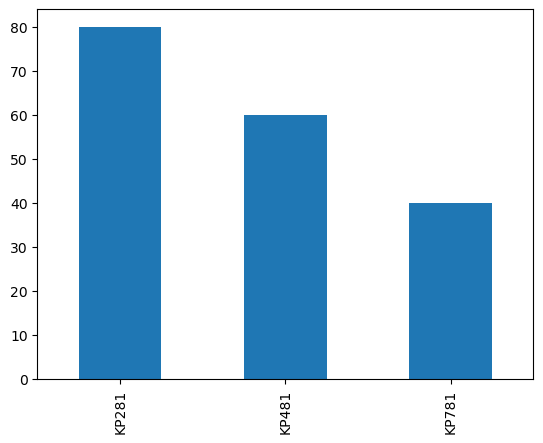

In [76]:
print(df['Product'].value_counts())
df['Product'].value_counts().plot(kind = 'bar')
plt.show()

In [77]:
df.Product.value_counts(normalize=True)

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

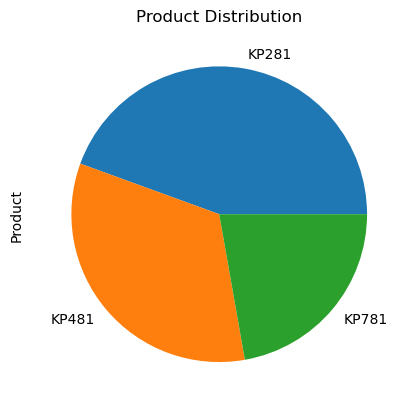

In [78]:
df.Product.value_counts(normalize=True).plot(kind="pie")
plt.title('Product Distribution')
plt.show()

# Q2 - Describe the Age & Gender distribution of all the customers.

In [79]:
df['Age'].describe()

count    180.000000
mean      28.788889
std        6.943498
min       18.000000
25%       24.000000
50%       26.000000
75%       33.000000
max       50.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Count'>

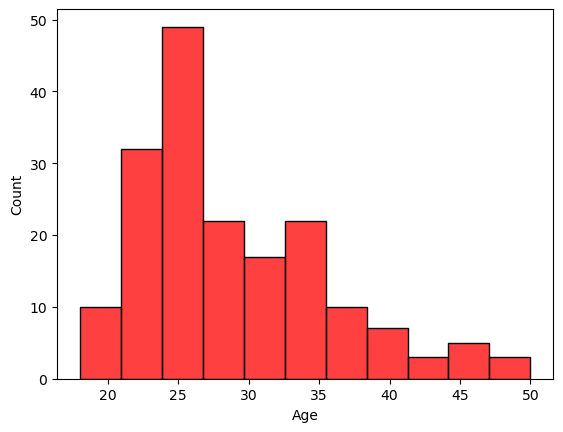

In [80]:
sns.histplot(df['Age'], color = 'red')

In [81]:
df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [82]:
df['Gender'].value_counts(normalize=True)

Male      0.577778
Female    0.422222
Name: Gender, dtype: float64

<AxesSubplot:>

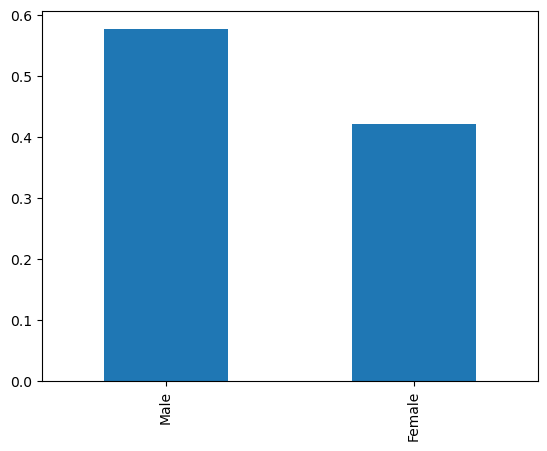

In [83]:
df['Gender'].value_counts(normalize=True).plot(kind="bar")

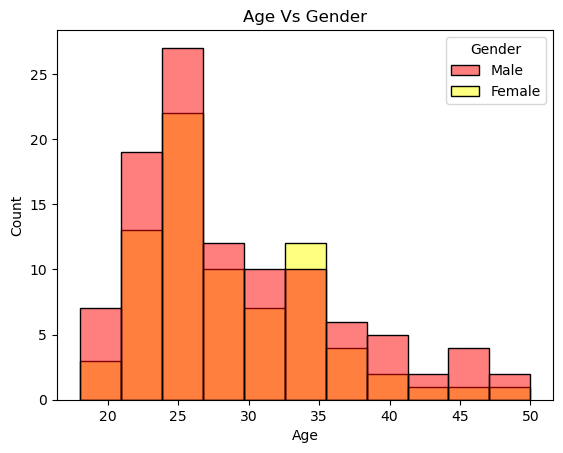

In [84]:
sns.histplot(data=df, x='Age', hue='Gender', palette=['red', 'yellow']).set_title("Age Vs Gender")
plt.show()

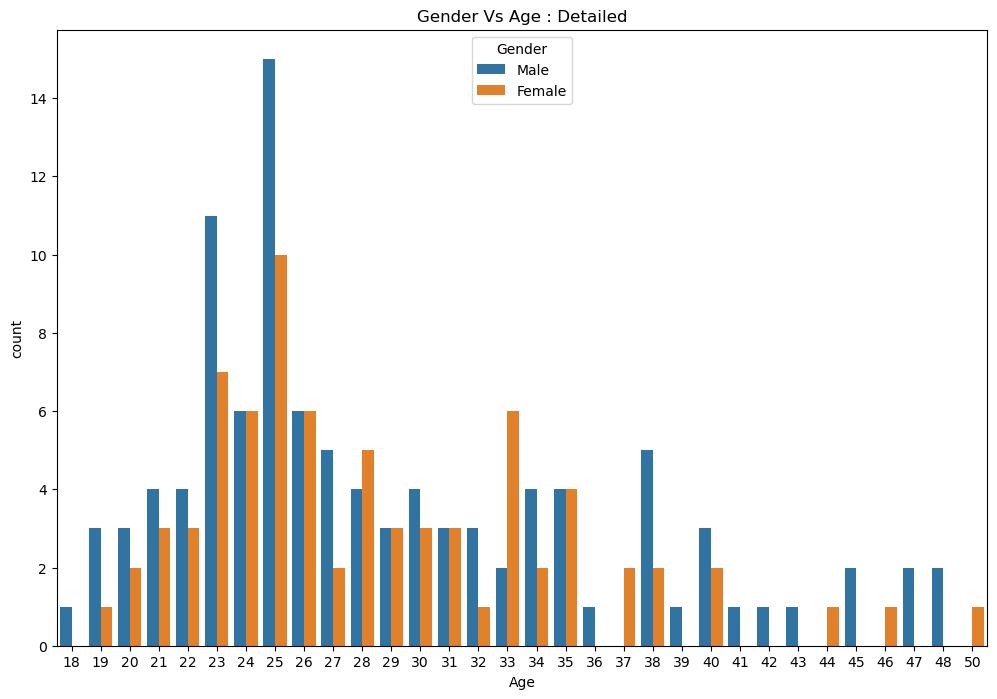

In [85]:
plt.figure(figsize=(12,8))
sns.countplot(data = df,
              x = "Age",
              hue = "Gender")
plt.title('Gender Vs Age : Detailed')
plt.show()

From the above mentioned figures we can clearly imply to the fact that we have the maximum number of young indivisuals ranging
from 22 to 30 years of age.
Making it **left skewed**, where the maximum number of males are more as compared to females except for the year 38 and 40.

# Q3 Name the top 3 features having the highest correlation with the 'Product' column. Also, provide possible reasons behind those correlations.

In [86]:
df.MaritalStatus.value_counts(normalize=True)

Partnered    0.594444
Single       0.405556
Name: MaritalStatus, dtype: float64

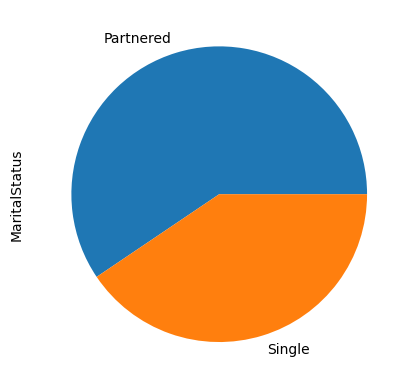

In [87]:
df.MaritalStatus.value_counts(normalize=True).plot(kind="pie")
plt.show()

**Probability of product bifercation on marital status**

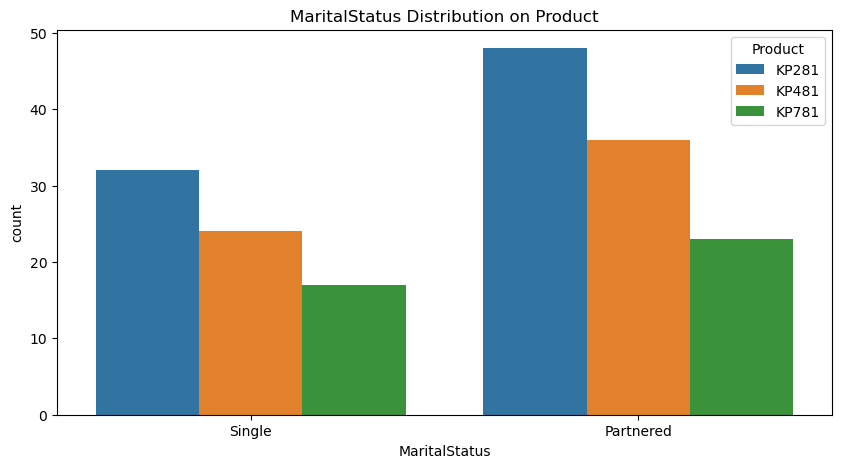

In [88]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='MaritalStatus', hue='Product', data=df)
plt.title('MaritalStatus Distribution on Product')
plt.show()

In [89]:
df.groupby('Gender')['Product'].value_counts(normalize=True)

Gender  Product
Female  KP281      0.526316
        KP481      0.381579
        KP781      0.092105
Male    KP281      0.384615
        KP781      0.317308
        KP481      0.298077
Name: Product, dtype: float64

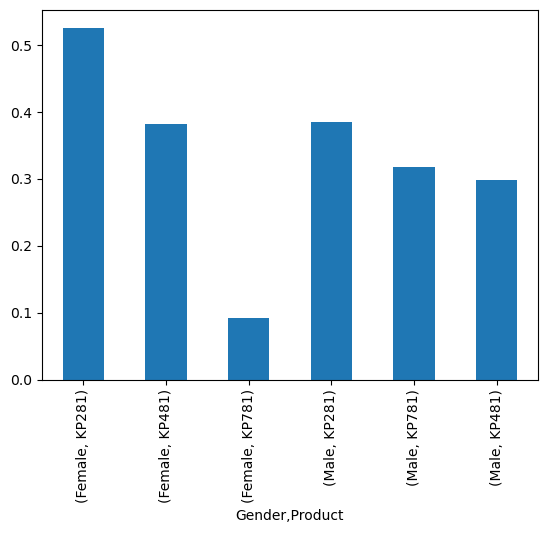

In [90]:
df.groupby('Gender')['Product'].value_counts(normalize=True).plot(kind="bar")
plt.show()

In [91]:
df.groupby('Product')['Gender'].value_counts(normalize=True)

Product  Gender
KP281    Female    0.500000
         Male      0.500000
KP481    Male      0.516667
         Female    0.483333
KP781    Male      0.825000
         Female    0.175000
Name: Gender, dtype: float64

In [92]:
df.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


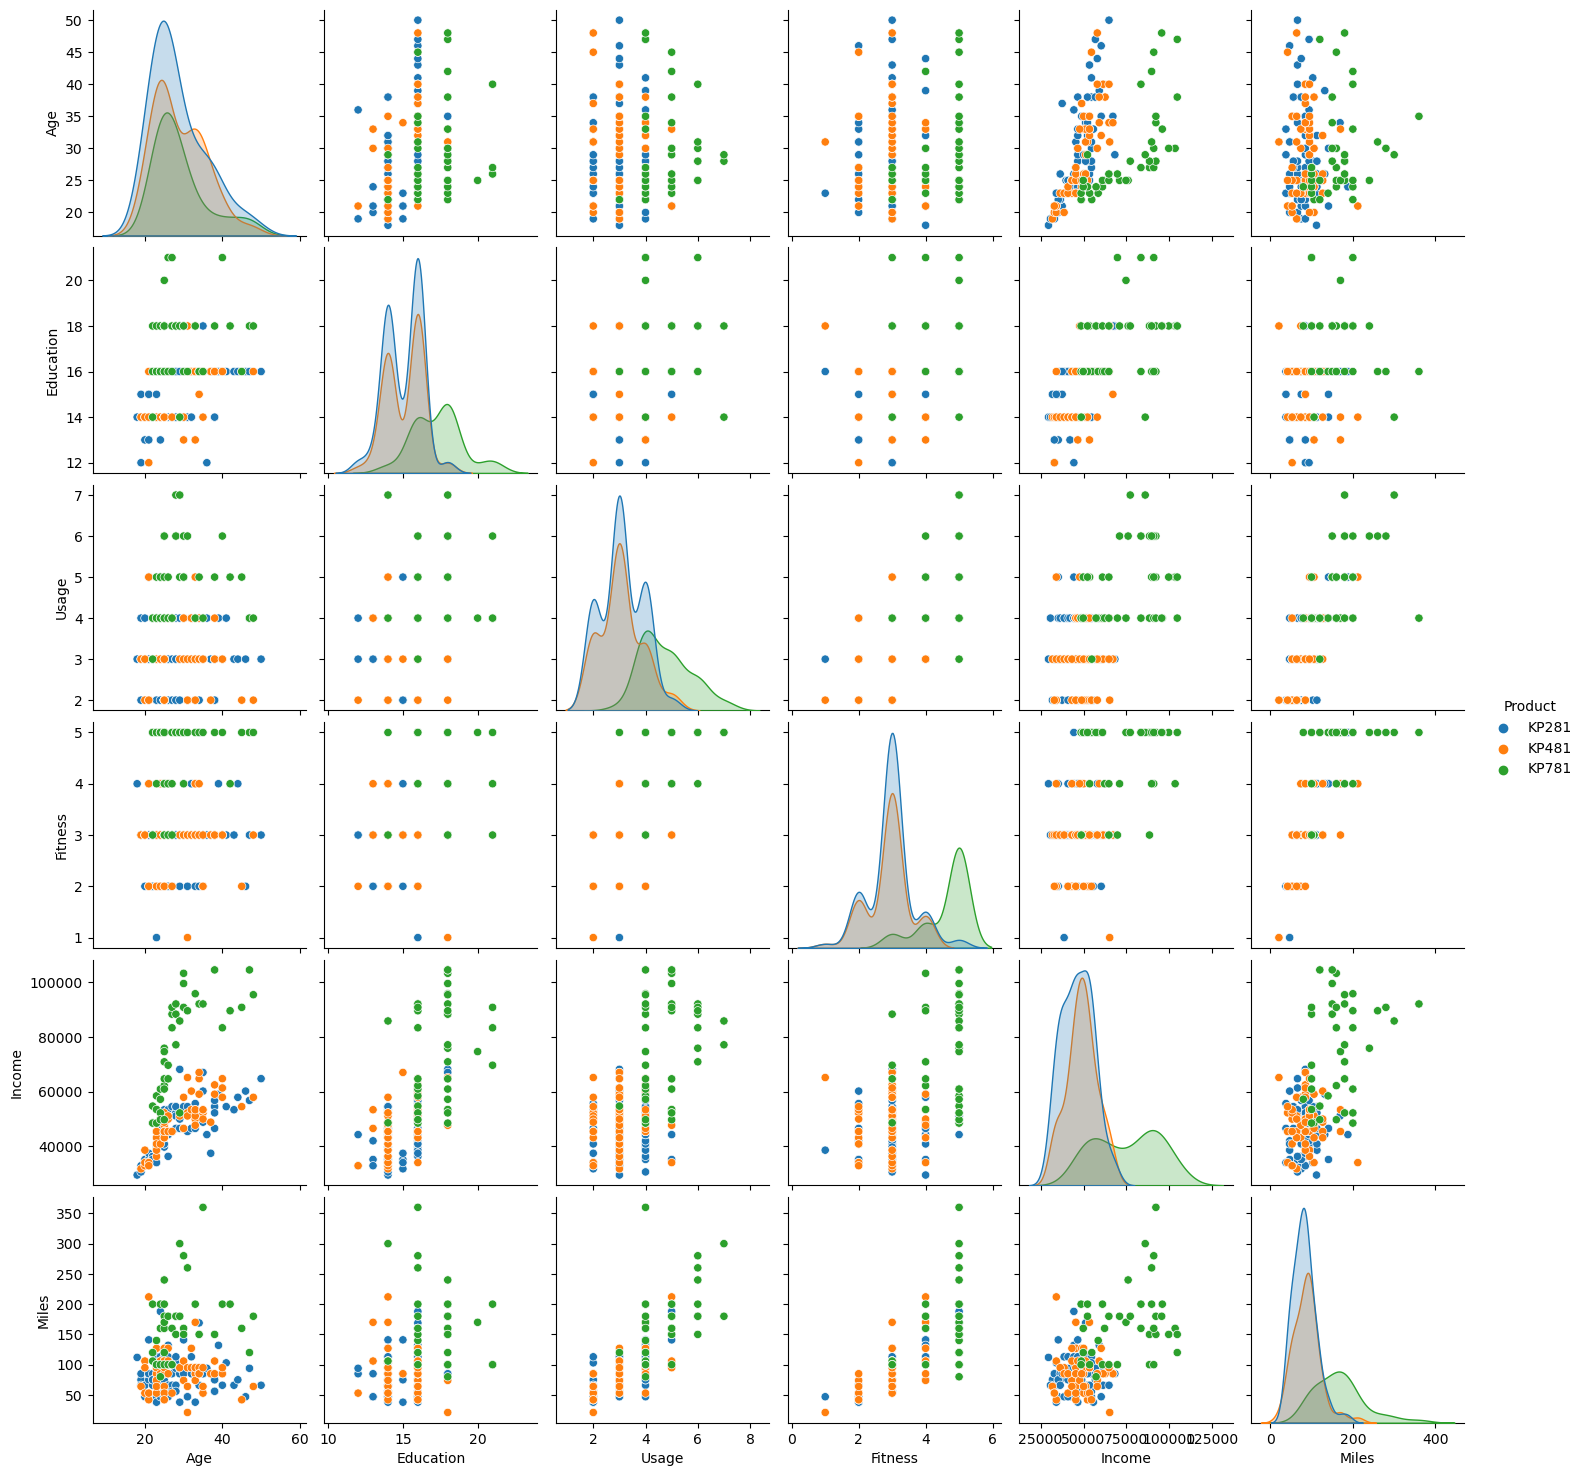

In [93]:
sns.pairplot(data = df, hue = 'Product')
plt.show()

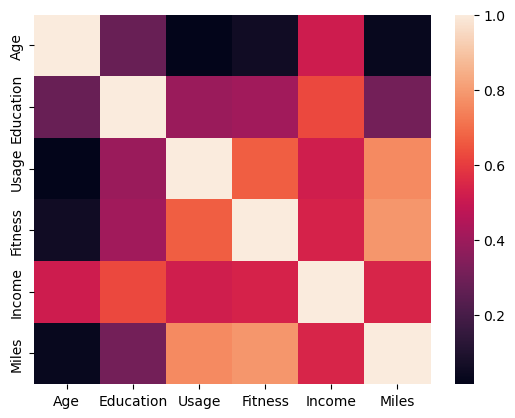

In [94]:
sns.heatmap(data = df.corr())
plt.show()

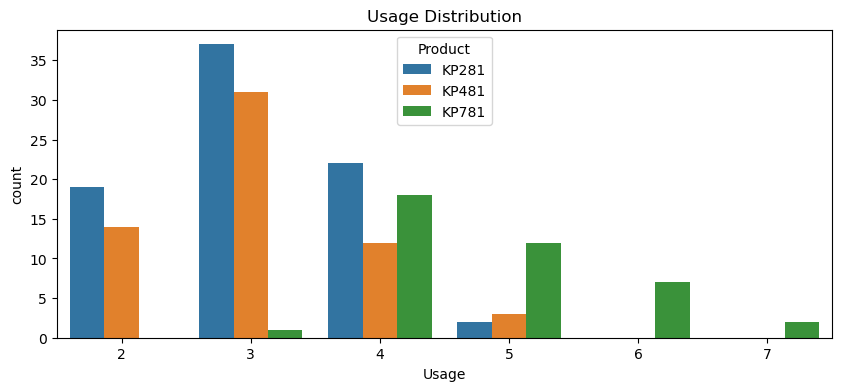

In [95]:
plt.figure(figsize=(10,4))
ax = sns.countplot(x='Usage', hue='Product', data=df)
plt.title('Usage Distribution')
plt.show()

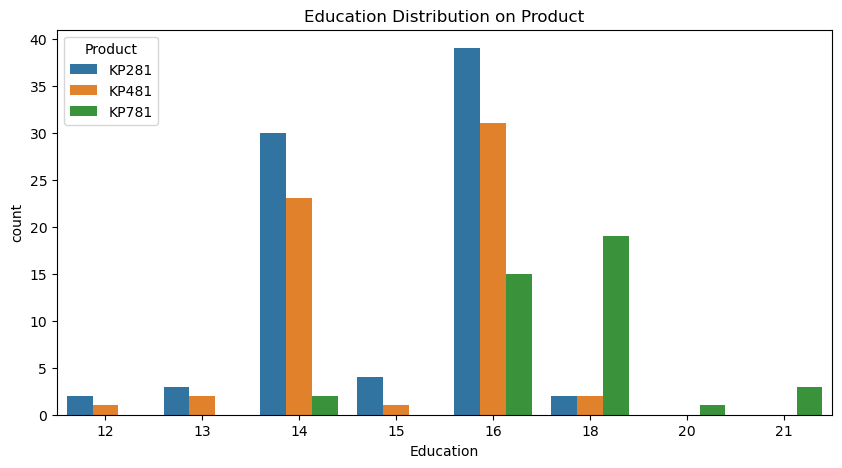

In [96]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='Education', hue='Product', data=df)
plt.title('Education Distribution on Product')
plt.show()

In [97]:
males = df.loc[df['Gender']=='Male']
males.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
7,KP281,21,Male,13,Single,3,3,32973,85


In [98]:
females = df.loc[df['Gender']=='Female']
females.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
2,KP281,19,Female,14,Partnered,4,3,30699,66
5,KP281,20,Female,14,Partnered,3,3,32973,66
6,KP281,21,Female,14,Partnered,3,3,35247,75
9,KP281,21,Female,15,Partnered,2,3,37521,85
11,KP281,22,Female,14,Partnered,3,2,35247,66


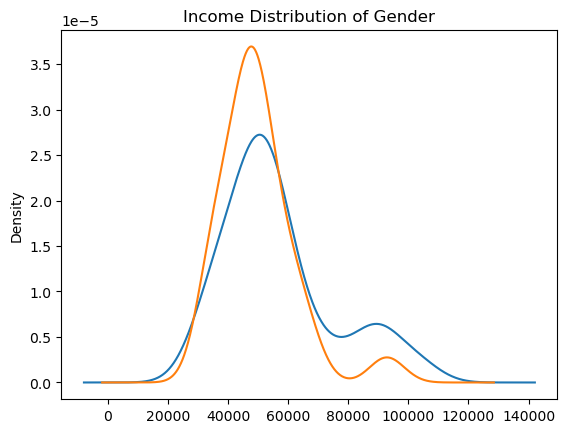

In [99]:
males.Income.plot(kind="kde", label="Males")
females.Income.plot(kind="kde", label="Females")
plt.title('Income Distribution of Gender')
plt.show()

It is evident that the features driving the product lineup are namely being:

    1. Income
    2. Usage
    3. Education

# Q4 Were there any outliers present in the data? If yes, suggest a suitable method for their treatment.

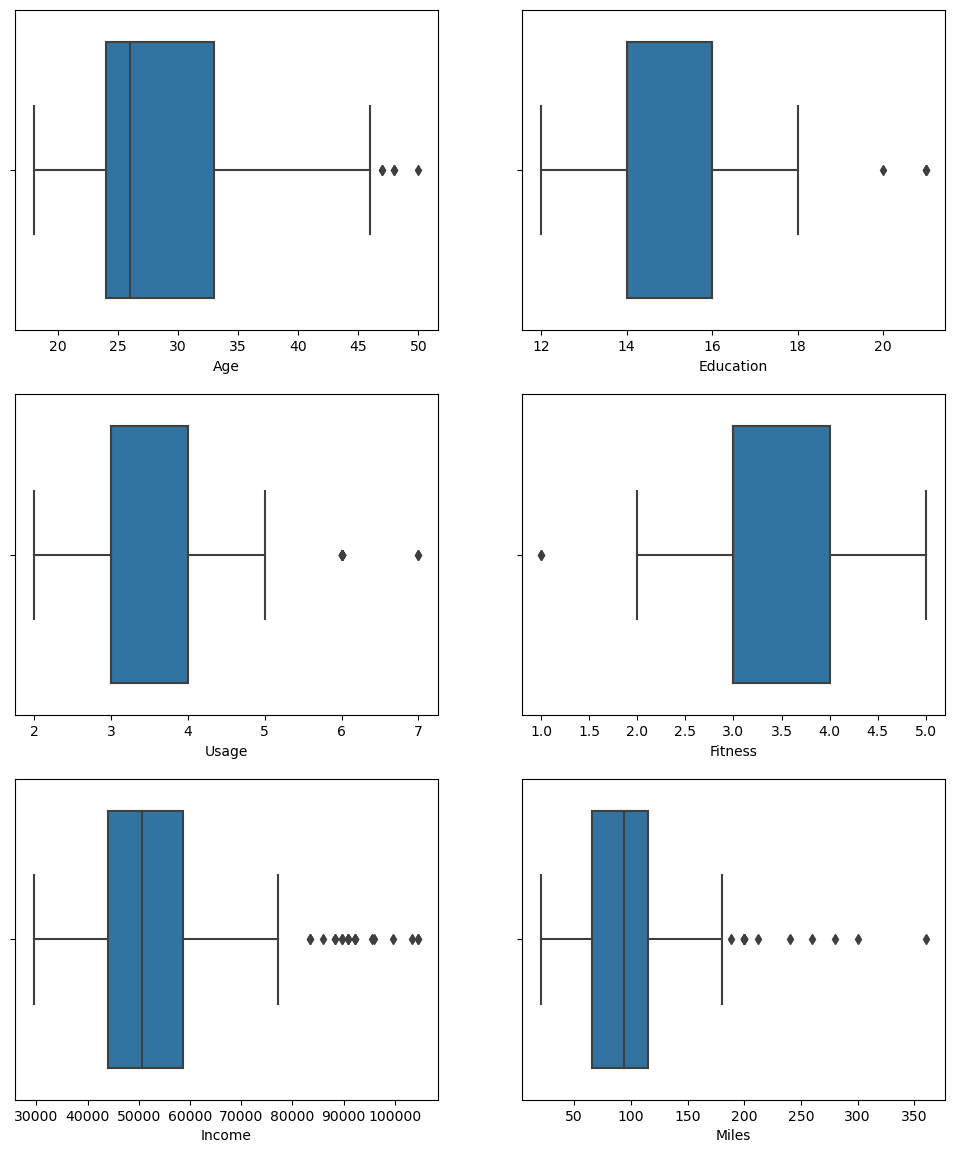

In [100]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df, x="Age", orient='h', ax=axis[0,0])
sns.boxplot(data=df, x="Education", orient='h', ax=axis[0,1])
sns.boxplot(data=df, x="Usage", orient='h', ax=axis[1,0])
sns.boxplot(data=df, x="Fitness", orient='h', ax=axis[1,1])
sns.boxplot(data=df, x="Income", orient='h', ax=axis[2,0])
sns.boxplot(data=df, x="Miles", orient='h', ax=axis[2,1])
plt.show()

**Treatment of outlier in case of Age**

In [101]:
Q1=df['Age'].quantile(0.25)
Q3=df['Age'].quantile(0.75)
IQR=Q3-Q1
print("Q1 :",Q1)
print("Q3 :",Q3)
print("IQR:",IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print("LW :",Lower_Whisker,"UW :",Upper_Whisker)

Q1 : 24.0
Q3 : 33.0
IQR: 9.0
LW : 10.5 UW : 46.5


In [102]:
df1 = df[df['Age']< Upper_Whisker]

<AxesSubplot:xlabel='Age'>

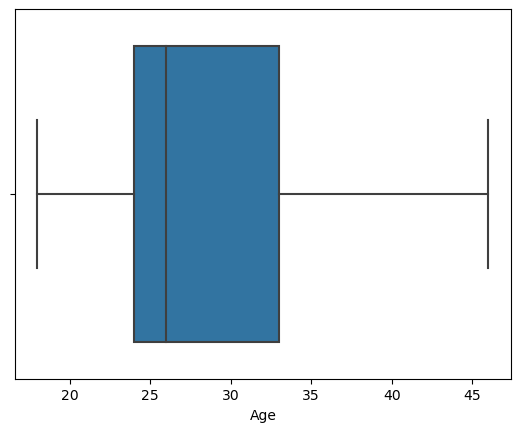

In [103]:
sns.boxplot(data=df1, x="Age", orient='h')

Using robust statistical methods : Interqurtile range, we were able to treat 50 as the outlier in the dataset.

# Q5 Marital Status implies no significant information on the usages of different treadmills. (T/F)

In [107]:
df.MaritalStatus.value_counts(normalize=True)

Partnered    0.594444
Single       0.405556
Name: MaritalStatus, dtype: float64

In [108]:
females.groupby('Product')['MaritalStatus'].value_counts(normalize=True)

Product  MaritalStatus
KP281    Partnered        0.675000
         Single           0.325000
KP481    Partnered        0.517241
         Single           0.482759
KP781    Partnered        0.571429
         Single           0.428571
Name: MaritalStatus, dtype: float64

In [109]:
males.groupby('Product')['MaritalStatus'].value_counts(normalize=True)

Product  MaritalStatus
KP281    Partnered        0.525000
         Single           0.475000
KP481    Partnered        0.677419
         Single           0.322581
KP781    Partnered        0.575758
         Single           0.424242
Name: MaritalStatus, dtype: float64

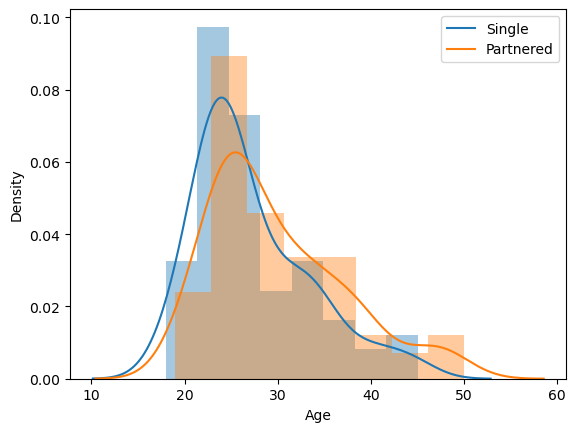

In [114]:
single = df[df['MaritalStatus']=='Single']
married = df[df['MaritalStatus']=='Partnered']
sns.distplot(x=single['Age'])
sns.distplot(x=married['Age'])
plt.legend(['Single', 'Partnered'])
plt.xlabel('Age')
plt.show()

Certainly as the data suggests, people who are between 24 to 32 are the ones who are more robust with the product lineup.
Having said that, people who are married also tends to use more that those who are single.

# Q6 The variance of income in lower ages is smaller as compared to the variance in higher ages, In statistics, this is known as.                                                                                                                                                                                    a) Heteroscedasticity                                                                                                 b) Linearity                                                                                             c)Homoscedasticity                                                                                    d)Normality

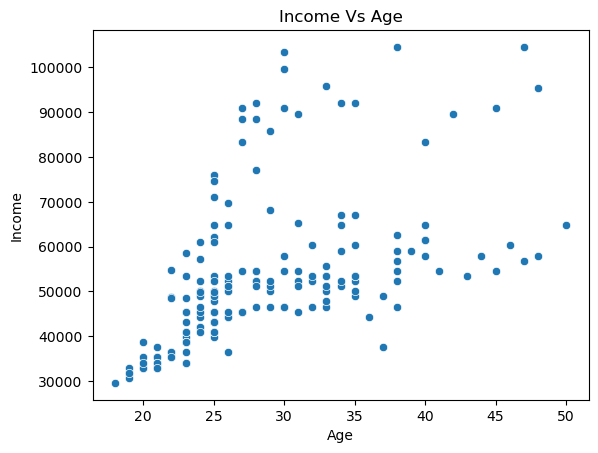

In [117]:
sns.scatterplot(data = df,
                x = "Age",
                y = "Income")
plt.title('Income Vs Age')
plt.show()

We can define **heteroscedasticity** as the condition in which the variance of error term or the residual term in a regression model varies. As you can see in the above diagram, a case of heteroscedasticity where the data points are not equally scattered on higher ages.


# Q7  What proportion of women have bought the KP781 treadmill? Give the reason behind your answer.

In [118]:
df.groupby('Gender')['Product'].value_counts(normalize=True)

Gender  Product
Female  KP281      0.526316
        KP481      0.381579
        KP781      0.092105
Male    KP281      0.384615
        KP781      0.317308
        KP481      0.298077
Name: Product, dtype: float64

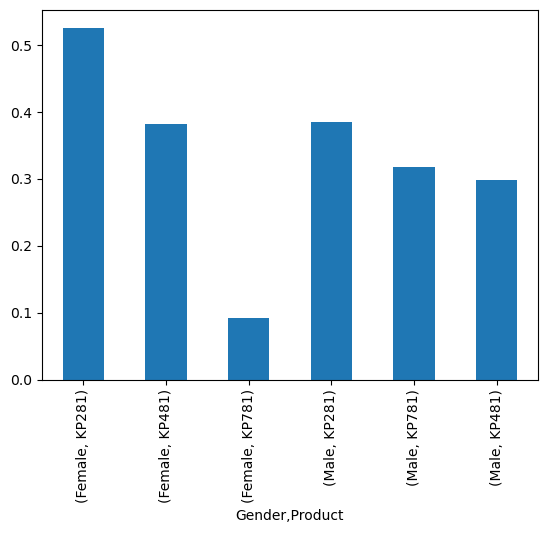

In [119]:
df.groupby('Gender')['Product'].value_counts(normalize=True).plot(kind="bar")
plt.show()

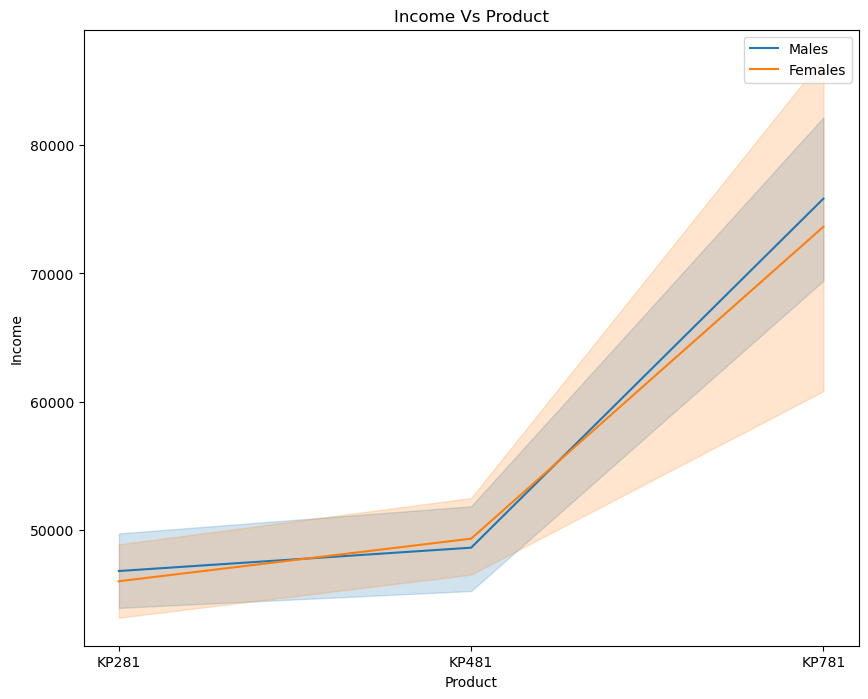

In [121]:
plt.figure(figsize=(10,8))
sns.lineplot(data=males,
             x="Product",
             y="Income",
             label = "Males")
sns.lineplot(data=females,
             x="Product",
             y="Income",
             label = "Females")
plt.title("Income Vs Product")
plt.show()

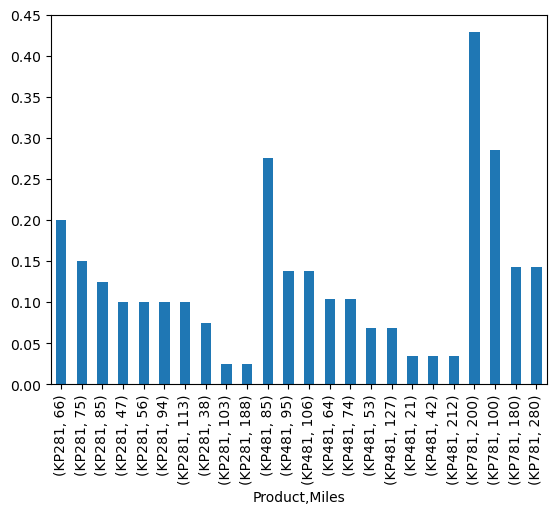

In [125]:
females.groupby('Product')['Miles'].value_counts(normalize=True).plot(kind="bar")
plt.show()

In [131]:
females.Product.value_counts(normalize=True)

KP281    0.526316
KP481    0.381579
KP781    0.092105
Name: Product, dtype: float64

<AxesSubplot:>

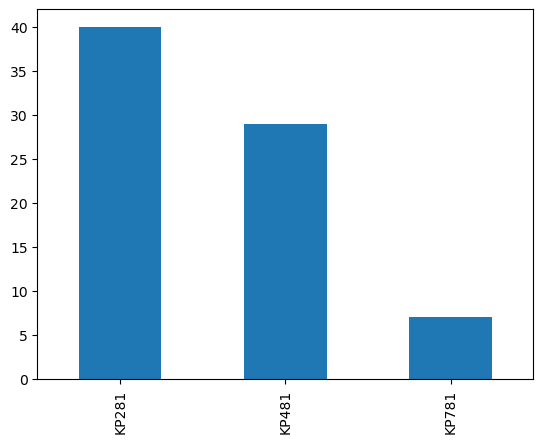

In [132]:
females.Product.value_counts().plot(kind='bar')

We can clearly see that only a handful of women tend to fall for advance features and a hefty price tag of 2,500 USD.
As only women who are either married, or runs more than 108 miles, or have a salary greater than 55,000 USD are only interested
in buying KP781

# Q8 Distinguish between Customer Profiles for KP281 & KP481 treadmills.

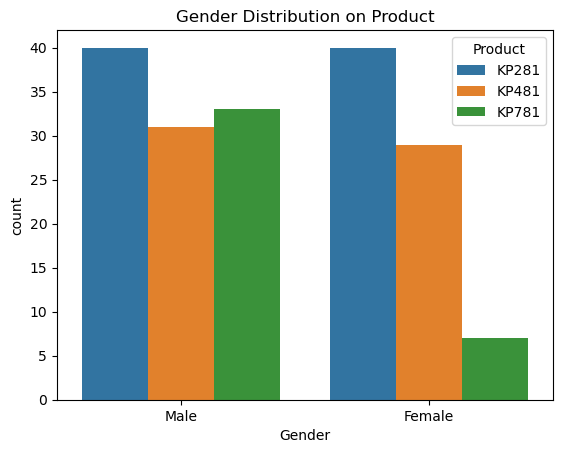

In [138]:
sns.countplot(data = df,
              x = "Gender",
              hue = "Product")
plt.title("Gender Distribution on Product")
plt.show()

In [135]:
df['Product'].value_counts(normalize=True)

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

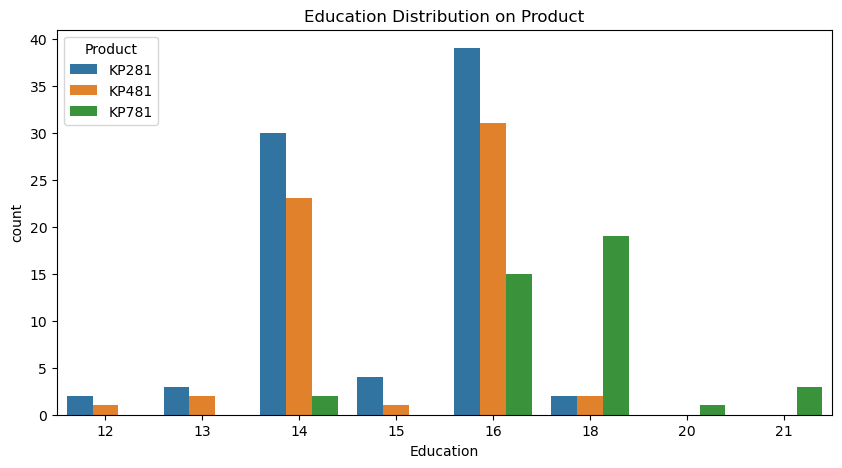

In [140]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='Education', hue='Product', data=df)
plt.title('Education Distribution on Product')
plt.show()

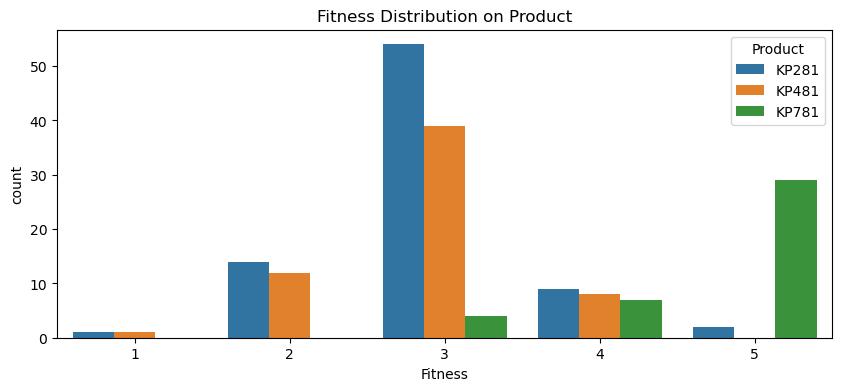

In [141]:
plt.figure(figsize=(10,4))
ax = sns.countplot(x='Fitness', hue='Product', data=df)
plt.title('Fitness Distribution on Product')
plt.show()

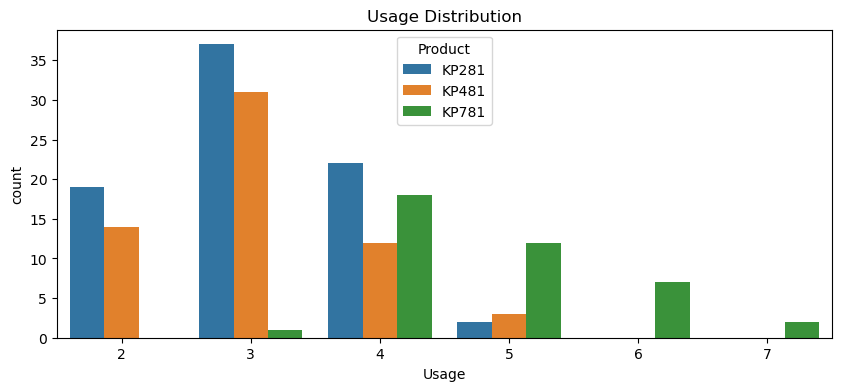

In [142]:
plt.figure(figsize=(10,4))
ax = sns.countplot(x='Usage', hue='Product', data=df)
plt.title('Usage Distribution')
plt.show()

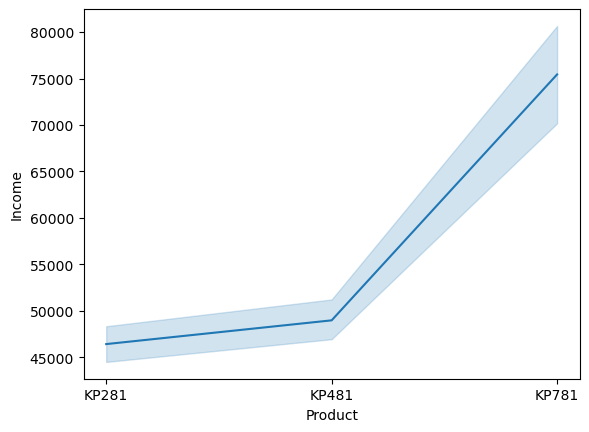

In [143]:
sns.lineplot(df['Product'],df['Income'])
plt.show()

It is generic that the product that is widely and extensively used is KP281, reason being:

    1. KP281 being a cheaper deal than KP481
    2. People who lies in the range of 14 to 16 years of education are more inclined towards KP281
    3. Both Male and Female are equally likely to buy KP281 as compared to KP481, being bought by mosly Males
    4. Most people falling into 60,000 to 45,000 income range ends up prioritizing KP281 over KP481
    5. People who conciders them less fit, uses more are also liking KP281.

# Q9 The overall Probability of Purchase for KP281, KP481 & KP781 treadmills is ___, ___ & ___.

In [144]:
df['Product'].value_counts(normalize=True)

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

# Q10 Give conditions when you will and when you'll not recommend KP781 treadmill to a customer.

With the above exploration of the dataset,
KP781 is recomended to the males and females who are earning more than 60,000 USD,
conciders them between 4 to 5 in the fitness scale and are probably married.
KP781 is not recomended to those who earns less than 55,000 USD,
who barely use their product, are highly educated.
